In [36]:
import numpy as np
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

In [226]:
import h5py
import logging
import numpy as np
import pandas as pd
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
from scipy.sparse import csr_matrix, dia_matrix, triu, tril, coo_matrix
import scipy.stats as stats
import os.path

In [435]:
! wget http://labshare.cshl.edu/shares/gillislab/resource/HiC/drosophila_40kbp_aggregate.h5 

--2021-12-02 16:04:20--  http://labshare.cshl.edu/shares/gillislab/resource/HiC/drosophila_40kbp_aggregate.h5
Resolving labshare.cshl.edu (labshare.cshl.edu)... 143.48.220.222
Connecting to labshare.cshl.edu (labshare.cshl.edu)|143.48.220.222|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11250586 (11M) [text/plain]
Saving to: ‘drosophila_40kbp_aggregate.h5’

drosophila_40kbp_ag 100%[===================>]  10.73M  --.-KB/s    in 0.1s    

2021-12-02 16:04:20 (104 MB/s) - ‘drosophila_40kbp_aggregate.h5’ saved [11250586/11250586]



In [436]:
jac_sim = hm.hiCMatrix('drosophila_40kbp_aggregate.h5')

In [303]:

exp_path = '/grid/gillis/data/lohia/hi_c_data_processing/data_drosophila/ERP016479/10kbp_raw/max/hic_gene_intra_KR.h5'
jac_sim = hm.hiCMatrix(exp_path)



In [285]:

exp_path = '/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/drosophila_prioAggNet.h5'
exp_file = hm.hiCMatrix(exp_path)


In [189]:
df_unique_variants_sig   = pd.read_csv(f'/grid/gillis/data/lohia/eQTL/GTEx_Analysis_v8_eQTL/sig_association.csv.gz', sep='\t' )



In [70]:
df_list = []
proj_l = ['aggregates'] 
#proj_l = ['aggregates'] 

for proj_name in proj_l:
    for dist in [0, 200000, 400000, 600000, 800000]:
    #for dist in [800000]:
    #for dist in [300000]:
    #for dist in [800000]:
    #for dist in [600000]:

      i_max = 1200000
      #i_max = dist+200000
    
    
    #for dist in [100000]:
      #for auc_cut in [0.1, 0.2,  0.4, 0.5, 0.6, 0.8, 2]:
      #for resolution in ['5kbp_raw', '10kbp_raw', '25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
      for resolution in ['1kbp_raw']:
        for pred_type in ['prediction']:
            #for tissue in ['Whole_Blood', 'Muscle_Skeletal']:
            for tissue in ['all']:

                for i in (list(range(1, 23))):
                #for i in (list(range(1, 7))):


                    try:
                        #df_b = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/tads/chr{i}_intra_KR_min30000_max1000000_step10000_thres0.05_delta0.01_fdr_boundaries.bed", sep='\t', names=['chrom', 'start', 'end', 'b_name', 'score', 'ex'])
                        #df_b['bin_start'] = [int(x/10000) for x in df_b['start']]
                        #df_b['bin_end'] = [int(x/10000) for x in df_b['end']]
                        #boundary_bins = df_b['bin_start'].tolist() + df_b['bin_end'].tolist() 

                        #df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/rao_GSE63525_GM12878_combined/10kbp_raw/gtex_scores_per_snp/chr{i}_{dist}_gtex_{pred_type}_{tissue}_kept_dup_200KB.csv", sep='\t')
                        #df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/{proj_name}/10kbp_raw/gtex_scores_per_snp/chr{i}_{dist}_gtex_1_all.csv", sep='\t')
                        df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/{proj_name}/{resolution}/gtex_scores_per_snp/chr{i}_{dist}_{i_max}_gtex_1_all_optimized.csv", sep='\t')
                        df['pred_type'] = pred_type
                        df['dist'] = dist
                        #df['auc_cut'] = auc_cut
                        df['proj'] = proj_name
                        df['resolution'] = resolution
                        df['bin'] = [x.split('_')[1] for x in  df['gene']]

                        df['bin'] = df['bin'].astype(int)/1000

                        #df['bin'] = df['bin'].astype(int)/2

                        df['bin'] = df['bin'].astype('int')
                        #df.drop_duplicates(['bin', 'dist'], inplace=True)
                        

                        
                        #df = df[df['auc_tss'] < auc_cut]
                        #df['bin'] =  [int(int(x.split('_')[1])/10000) for x in df['gene']]

                        #df[df['auc_jac'] > 0.6].shape[0]/df.shape[0]

                        #df['boundary'] = [1 if x in boundary_bins else 0 for x in df['bin']]
                        df['tissue'] = tissue
                        df_list.append(df)
                    except:
                        a = 3
                        print (f"{proj_name}/10kbp_raw/gtex_scores_per_snp/{resolution}_chr{i}_{dist}_gtex_1_all.csv")
                        

In [72]:
df_agg = pd.concat(df_list)
df_agg = df_agg.dropna()

In [20]:
df_agg

auc_tss    auc_KR                    gene  total_variants  \
0     0.830882  0.852941   chr1_10017339_C_A_b38          137580   
1     0.854545  0.890909   chr1_10017435_C_T_b38          137580   
2     0.714286  0.714286  chr1_100179156_T_C_b38          137580   
3     1.000000  1.000000  chr1_100179332_G_A_b38          137580   
4     0.714286  0.714286  chr1_100179620_T_G_b38          137580   
...        ...       ...                     ...             ...   
2222  0.000000  0.500000  chr22_49954348_A_C_b38           24172   
2223  0.000000  0.500000  chr22_49954349_T_C_b38           24172   
2224  0.000000  0.500000  chr22_49955322_A_G_b38           24172   
2225  0.000000  0.000000  chr22_49955996_A_G_b38           24172   
2226  0.000000  0.000000  chr22_49956619_A_G_b38           24172   

      given_bin_start  total_genes  total_tp   pred_type    dist        proj  \
0               10017           38         4  prediction       0  aggregates   
1               10017           38         5  prediction       0  aggregates   
2              100179           30         2  prediction       0  aggregates   
3              100179           30         1  prediction       0  aggregates   
4              100179           30         2  prediction       0  aggregates   
...               ...          ...       ...         ...     ...         ...   
2222            49954            3         1  prediction  800000  aggregates   
2223            49954            3         1  prediction  800000  aggregates   
2224            49955            3         1  prediction  800000  aggregates   
2225            49955            2         1  prediction  800000  aggregates   
2226            49956            2         1  prediction  800000  aggregates   

     resolution     bin tissue  
0      1kbp_raw   10017    all  
1      1kbp_raw   10017    all  
2      1kbp_raw  100179    all  
3      1kbp_raw  100179    all  
4      1kbp_raw  100179    all  
...         ...     ...    ...  
2222   1kbp_raw   49954    all  
2223   1kbp_raw   49954    all  
2224   1kbp_raw   49955    all  
2225   1kbp_raw   49955    all  
2226   1kbp_raw   49956    all  

[3263870 rows x 13 columns]

In [73]:
import seaborn as sns
dt = pd.melt(df_agg[df_agg['proj'] == 'aggregates'], id_vars=['gene', 'dist', 'bin'], value_vars=['auc_tss', 'auc_KR'])
#sns.catplot(data=dt , y='value',x='dist', aspect=3, kind='box', color='royalblue', hue='variable')


In [6]:
dt['value_g'] = [1 if x>=0.99 else 0 for x in dt['value']]
dt['value_f'] = [1 if x<=0.01 else 0 for x in dt['value']]

In [18]:
#new
dt.groupby(['dist', 'variable'])['value'].mean()

dist    variable
0       auc_KR      0.793493
        auc_tss     0.802348
200000  auc_KR      0.692747
        auc_tss     0.685015
400000  auc_KR      0.639205
        auc_tss     0.604978
600000  auc_KR      0.610108
        auc_tss     0.552772
800000  auc_KR      0.592272
        auc_tss     0.523893
Name: value, dtype: float64

In [25]:
dt.groupby(['dist', 'variable'])['value'].mean()

dist    variable
0       auc_KR      0.781794
        auc_tss     0.782533
200000  auc_KR      0.682990
        auc_tss     0.666131
400000  auc_KR      0.633522
        auc_tss     0.592273
600000  auc_KR      0.608604
        auc_tss     0.545617
800000  auc_KR      0.596681
        auc_tss     0.521356
Name: value, dtype: float64

In [21]:
dt.groupby(['dist', 'variable'])['value'].count()

dist    variable
0       auc_KR      1574194
        auc_tss     1574194
200000  auc_KR       799459
        auc_tss      799459
400000  auc_KR       470401
        auc_tss      470401
600000  auc_KR       280726
        auc_tss      280726
800000  auc_KR       139090
        auc_tss      139090
Name: value, dtype: int64

<AxesSubplot:xlabel='auc_tss', ylabel='Count'>

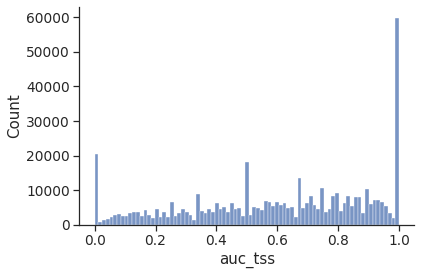

In [80]:
sns.histplot(data=df_agg[df_agg['dist']==400000], x='auc_tss')

<AxesSubplot:xlabel='auc_tss', ylabel='Count'>

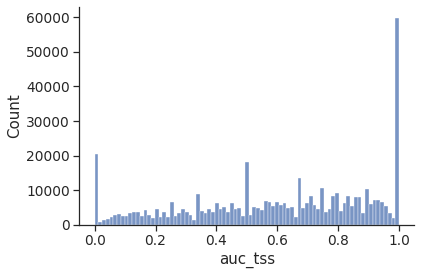

In [85]:
sns.histplot(data=df_agg[df_agg['dist']==400000], x='auc_tss')

In [75]:
dt

gene    dist     bin variable     value
0         chr1_10017339_C_A_b38       0   10017  auc_tss  0.830882
1         chr1_10017435_C_T_b38       0   10017  auc_tss  0.854545
2        chr1_100179156_T_C_b38       0  100179  auc_tss  0.714286
3        chr1_100179332_G_A_b38       0  100179  auc_tss  1.000000
4        chr1_100179620_T_G_b38       0  100179  auc_tss  0.714286
...                         ...     ...     ...      ...       ...
6527735  chr22_49954348_A_C_b38  800000   49954   auc_KR  0.500000
6527736  chr22_49954349_T_C_b38  800000   49954   auc_KR  0.500000
6527737  chr22_49955322_A_G_b38  800000   49955   auc_KR  0.500000
6527738  chr22_49955996_A_G_b38  800000   49955   auc_KR  0.000000
6527739  chr22_49956619_A_G_b38  800000   49956   auc_KR  0.000000

[6527740 rows x 5 columns]

In [82]:
dt.groupby(['dist', 'variable'])['value'].count()

dist    variable
0       auc_KR      1574194
        auc_tss     1574194
200000  auc_KR       799459
        auc_tss      799459
400000  auc_KR       470401
        auc_tss      470401
600000  auc_KR       280726
        auc_tss      280726
800000  auc_KR       139090
        auc_tss      139090
Name: value, dtype: int64

In [83]:
dt.groupby(['dist', 'variable'])['value'].median()

dist    variable
0       auc_KR      0.875000
        auc_tss     0.887755
200000  auc_KR      0.750000
        auc_tss     0.750000
400000  auc_KR      0.666667
        auc_tss     0.642857
600000  auc_KR      0.600000
        auc_tss     0.571429
800000  auc_KR      0.518519
        auc_tss     0.500000
Name: value, dtype: float64

In [69]:
#new
dt.groupby(['dist', 'variable'])['value'].median()

KeyError: 'dist'

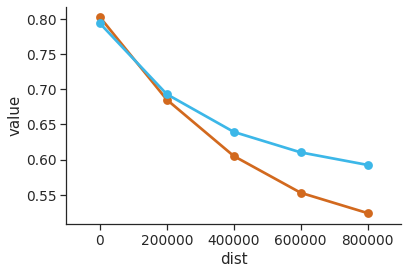

In [19]:
sc_bar = sns.pointplot(data=dt, x='dist', y='value',hue='variable', palette=['chocolate','#3CB7E8'], linewidth=4, estimator=np.mean)
sc_bar.legend().remove()

#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/gtex_at_each_dist.pdf',
#            transparent=True)

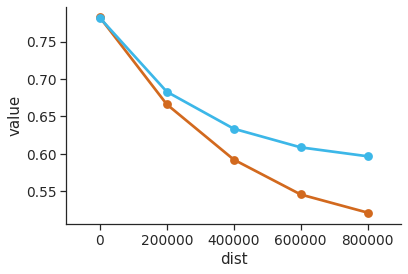

In [27]:
sc_bar = sns.pointplot(data=dt, x='dist', y='value',hue='variable', palette=['chocolate','#3CB7E8'], linewidth=4, estimator=np.mean)
sc_bar.legend().remove()


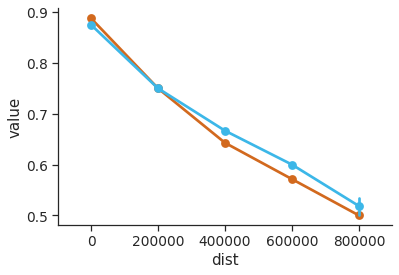

In [81]:
sc_bar = sns.pointplot(data=dt, x='dist', y='value',hue='variable', palette=['chocolate','#3CB7E8'], linewidth=4, estimator=np.median)
sc_bar.legend().remove()


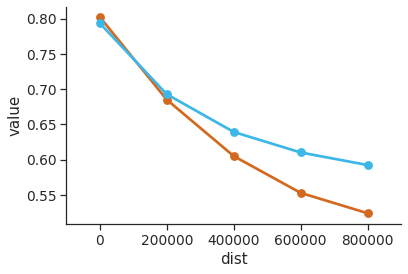

In [84]:
sc_bar = sns.pointplot(data=dt, x='dist', y='value',hue='variable', palette=['chocolate','#3CB7E8'], linewidth=4, estimator=np.mean)
sc_bar.legend().remove()

In [1]:
import pandas as pd
import seaborn as sns
df_list = []
contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_human/stats/'
df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])
proj_l = ['aggregates'] + df_con['id'].tolist()
#proj_l = ['aggregates'] 
counter = 0
for proj_name in proj_l:
    counter = counter +1
    for dist in [0, 200000, 400000, 600000, 800000]:
    #for dist in [300000]:
    #for dist in [800000]:
    #for dist in [600000]:

      i_max = 1200000
    #for dist in [100000]:
      #for auc_cut in [0.1, 0.2,  0.4, 0.5, 0.6, 0.8, 2]:
      #for resolution in ['5kbp_raw', '10kbp_raw', '25kbp_raw', '40kbp_raw', '100kbp_raw', '250kbp_raw']:
      for resolution in ['1kbp_raw']:
        for pred_type in ['prediction']:
            #for tissue in ['Whole_Blood', 'Muscle_Skeletal']:
            for tissue in ['all']:

                for i in (list(range(1, 23))):
                #for i in (list(range(1, 7))):


                    try:
                        #df_b = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/tads/chr{i}_intra_KR_min30000_max1000000_step10000_thres0.05_delta0.01_fdr_boundaries.bed", sep='\t', names=['chrom', 'start', 'end', 'b_name', 'score', 'ex'])
                        #df_b['bin_start'] = [int(x/10000) for x in df_b['start']]
                        #df_b['bin_end'] = [int(x/10000) for x in df_b['end']]
                        #boundary_bins = df_b['bin_start'].tolist() + df_b['bin_end'].tolist() 

                        #df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/rao_GSE63525_GM12878_combined/10kbp_raw/gtex_scores_per_snp/chr{i}_{dist}_gtex_{pred_type}_{tissue}_kept_dup_200KB.csv", sep='\t')
                        #df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/{proj_name}/10kbp_raw/gtex_scores_per_snp/chr{i}_{dist}_gtex_1_all.csv", sep='\t')
                        df = pd.read_csv(f"/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/{proj_name}/{resolution}/gtex_scores_per_snp/chr{i}_{dist}_{i_max}_gtex_1_all_optimized.csv", sep='\t')
                        df['pred_type'] = pred_type
                        df['dist'] = dist
                        #df['auc_cut'] = auc_cut
                        df['proj'] = proj_name
                        df['resolution'] = resolution
                        df['bin'] = [x.split('_')[1] for x in  df['gene']]

                        df['bin'] = df['bin'].astype(int)/1000

                        #df['bin'] = df['bin'].astype(int)/2

                        df['bin'] = df['bin'].astype('int')
                        #df.drop_duplicates(['bin', 'dist'], inplace=True)
                        df['resolution'] = int(dist/1000)
                        df.dropna()
                        

                        
                        #df = df[df['auc_tss'] < auc_cut]
                        #df['bin'] =  [int(int(x.split('_')[1])/10000) for x in df['gene']]

                        #df[df['auc_jac'] > 0.6].shape[0]/df.shape[0]

                        #df['boundary'] = [1 if x in boundary_bins else 0 for x in df['bin']]
                        df['tissue'] = tissue
                        #print (counter, i)
                        df_list.append(df[['auc_tss', 'auc_KR', 'proj', 'dist']])
                    except:
                        a = 3
                        
                        #print (counter, f"{proj_name}/10kbp_raw/gtex_scores_per_snp/{resolution}_chr{i}_{dist}_gtex_1_all.csv")
                        

In [2]:
df = pd.concat(df_list)


In [8]:
#df['auc_tss_g'] = [1 if x >= 0.99 else 0 for x in df['auc_tss']]
#df['auc_KR_g'] = [1 if x >= 0.99 else 0 for x in df['auc_KR']]
df['auc_tss_g'] = [x for x in df['auc_tss']]
df['auc_KR_g'] = [x for x in df['auc_KR']]
#df['auc_KR_both'] = [1 if (x >= 0.99) | (y > 0.99) | (z > 0.99) else 0 for x, y, z in zip(df['auc_KR_g'], df['auc_KR_g'], df['auc_tss_g'])]


In [3]:
df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/stats/human_exclude_count_intra.txt', sep='\t')



df_seq_depth_exp = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/stats/human_project_network_details.tsv', sep='\t')
df_seq_depth_exp['species'] = "human"
df_seq_depth_exp['project'] = [x.strip() for x in df_seq_depth_exp['project']]
df_seq_depth_exp['experiment type'] = [x.strip() for x in df_seq_depth_exp['experiment type']]
df_seq_depth_exp['experiment type'] = [x if x=='Hi-C' else 'o' for x in df_seq_depth_exp['experiment type']]
    

In [4]:
dt = df_seq_depth.merge(df_seq_depth_exp, left_on='proj_id', right_on='project')

In [17]:
dj = df.groupby(['proj', 'dist'])[ 'auc_tss', 'auc_KR' ].mean().reset_index().merge(dt.groupby(['proj_id', 'experiment type'])['counts_intra'].sum().reset_index(), left_on=['proj'], right_on=['proj_id'])
#dj = df.groupby(['proj'])['auc_tss', 'auc_jac', 'auc_KR_ranked'].mean().reset_index().merge(df_seq_depth.groupby(['proj_id'])['counts_intra'].sum().reset_index(), left_on=['proj'], right_on=['proj_id'])


<ipython-input-17-8ba1d3801af7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dj = df.groupby(['proj', 'dist'])[ 'auc_tss', 'auc_KR' ].mean().reset_index().merge(dt.groupby(['proj_id', 'experiment type'])['counts_intra'].sum().reset_index(), left_on=['proj'], right_on=['proj_id'])


In [18]:
_df = df[df['proj'] == 'aggregates'].groupby(['proj', 'dist'])['auc_tss', 'auc_KR' ].mean().reset_index()


<ipython-input-18-59f77f27ecaa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  _df = df[df['proj'] == 'aggregates'].groupby(['proj', 'dist'])['auc_tss', 'auc_KR' ].mean().reset_index()


In [19]:
_df['counts_intra'] = dt['counts_intra'].sum()

In [20]:
_df['type'] = 'agg'

In [21]:
dj['type'] = 'ind'

In [22]:
dj = pd.concat([_df, dj[dj['proj'] != 'aggregates']])

In [23]:
import numpy as np
dj['log_con'] = [np.log10(x) for x in dj['counts_intra']]

In [24]:
_df['log_con'] = [np.log10(x) for x in _df['counts_intra']]

In [25]:
dj['auc_KR_g_log_con'] = [np.log10(x) for x in dj['auc_KR']]

In [60]:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'

In [26]:
dj

proj    dist   auc_tss    auc_KR  counts_intra type    proj_id  \
0    aggregates       0  0.802348  0.793493  208492043801  agg        NaN   
1    aggregates  200000  0.685015  0.692747  208492043801  agg        NaN   
2    aggregates  400000  0.604978  0.639205  208492043801  agg        NaN   
3    aggregates  600000  0.552772  0.610108  208492043801  agg        NaN   
4    aggregates  800000  0.523893  0.592272  208492043801  agg        NaN   
..          ...     ...       ...       ...           ...  ...        ...   
590   SRP274139       0  0.802348  0.695966     429435501  ind  SRP274139   
591   SRP274139  200000  0.685015  0.614473     429435501  ind  SRP274139   
592   SRP274139  400000  0.604978  0.580210     429435501  ind  SRP274139   
593   SRP274139  600000  0.552772  0.559279     429435501  ind  SRP274139   
594   SRP274139  800000  0.523893  0.544403     429435501  ind  SRP274139   

    experiment type    log_con  auc_KR_g_log_con  
0               NaN  11.319089         -0.100457  
1               NaN  11.319089         -0.159425  
2               NaN  11.319089         -0.194360  
3               NaN  11.319089         -0.214593  
4               NaN  11.319089         -0.227479  
..              ...        ...               ...  
590            Hi-C   8.632898         -0.157412  
591            Hi-C   8.632898         -0.211497  
592            Hi-C   8.632898         -0.236414  
593            Hi-C   8.632898         -0.252371  
594            Hi-C   8.632898         -0.264079  

[600 rows x 10 columns]

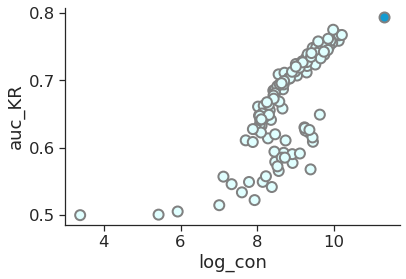

In [62]:
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy
sc_bar = sns.scatterplot(data=dj[dj['dist']==0], x='log_con', y='auc_KR', hue='type', style='type', palette=[ color_2, color_1],edgecolor="grey", s=100, linewidth=2, markers =  {"ind": "o", "agg": "o"})
#ax.set_ylim([15000, 25000])
sc_bar.legend().remove()
#ax = sns.scatterplot(data=dj[dj['dist']==0], x='log_con', y='auc_tss', color='#43EB14')
#sns.scatterplot(data=dj, x='log_con', y='auc_KR_ranked_g', hue='type', palette=[ 'black', 'darkorange'])
#ax.set_ylim([15000, 25000])
#ax.axhline(_df[_df['dist']==0]['auc_tss'].values, color='#43EB14')
sc_bar.legend().remove()

plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/gtex_ind_vs_agg.pdf',
            transparent=True)


In [ ]:
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='dist', y='auc_KR', data=dj[dj['type']=='ind'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='dist', y='auc', data=dj[dj['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='dist', y='auc_KR', data=dj[dj['type']=='agg'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o')
        sns.swarmplot(x='dist', y='auc_tss', data=dj[dj['type']=='agg'], ax=ax, size=10, color='orange', edgecolor='grey', linewidth=2,marker='o')
        plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/gtex_ind_vs_agg_all_resol.pdf',
            transparent=True)
        
        

In [540]:
df_counts = df[df['proj'] == 'aggregates'].groupby(['proj', 'resolution'])['auc_tss_g'].count().reset_index()



In [541]:
df_counts

proj  resolution  auc_tss_g
0  aggregates           0    1574194
1  aggregates         200     799459
2  aggregates         400     470401
3  aggregates         600     280726

<AxesSubplot:xlabel='resolution', ylabel='auc_tss_g'>

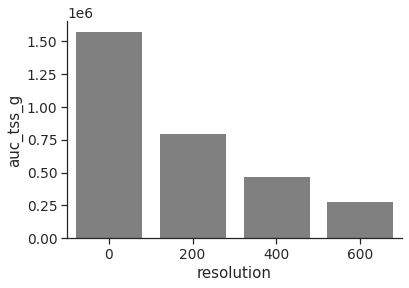

In [544]:
sns.barplot(data=df_counts, x='resolution', y='auc_tss_g', color='grey')
